# Tubes 1 Pembelajaran mesin
M Fadhil
1301180263

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import math
%matplotlib inline
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA ##principle component analys

In [2]:
data = pd.read_csv('kendaraan_train.csv') ##Import data
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Data Exploration

In [3]:
selected_col = ['Umur','Premi','SIM','Kode_Daerah','Sudah_Asuransi','Kanal_Penjualan','Lama_Berlangganan','Tertarik']
used_data = data[selected_col]
used_data ##data yang akan digunakan

,Umur,Premi,SIM,Kode_Daerah,Sudah_Asuransi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,28029.0,1.0,33.0,1.0,152.0,97.0,0
1,48.0,25800.0,1.0,39.0,0.0,29.0,158.0,0
2,21.0,32733.0,1.0,46.0,1.0,160.0,119.0,0
3,58.0,2630.0,1.0,48.0,0.0,124.0,63.0,0
4,50.0,34857.0,1.0,35.0,0.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...
285826,23.0,25988.0,1.0,4.0,1.0,152.0,217.0,0
285827,21.0,44686.0,1.0,46.0,1.0,152.0,50.0,0
285828,23.0,49751.0,1.0,50.0,1.0,152.0,226.0,0
285829,68.0,30503.0,1.0,7.0,1.0,124.0,270.0,0


In [4]:
#delete data sama
dup = used_data.duplicated()
print(dup.sum())
data_fix = used_data
data_fix = data_fix.drop_duplicates()
data_fix.describe()

631


,Umur,Premi,SIM,Kode_Daerah,Sudah_Asuransi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271033.000000,270835.000000,270798.000000,270930.000000,270975.000000,270907.000000,271450.000000,285200.000000
mean,38.850952,30580.406602,0.997843,26.404857,0.458721,112.010513,154.296154,0.122633
std,15.526329,17132.805229,0.046389,13.253457,0.498294,54.205490,83.694656,0.328016
min,20.000000,2630.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,25.000000,24444.000000,1.000000,15.000000,0.000000,29.000000,82.000000,0.000000
50%,36.000000,31666.000000,1.000000,28.000000,0.000000,131.000000,154.000000,0.000000
75%,49.000000,39395.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000
max,85.000000,540165.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000


# PreProcess 
Missing Value

In [5]:
print(data_fix.isnull().sum())
data_final = data_fix
data_final = data_final.dropna(how='any',subset=['Umur','Premi','SIM','Kode_Daerah','Sudah_Asuransi','Kanal_Penjualan','Lama_Berlangganan','Tertarik'])
print('=====fixed======')
print(data_final.isnull().sum())
data_final

Umur                 14167
Premi                14365
SIM                  14402
Kode_Daerah          14270
Sudah_Asuransi       14225
Kanal_Penjualan      14293
Lama_Berlangganan    13750
Tertarik                 0
dtype: int64
=====fixed======
Umur                 0
Premi                0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


,Umur,Premi,SIM,Kode_Daerah,Sudah_Asuransi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,28029.0,1.0,33.0,1.0,152.0,97.0,0
1,48.0,25800.0,1.0,39.0,0.0,29.0,158.0,0
2,21.0,32733.0,1.0,46.0,1.0,160.0,119.0,0
3,58.0,2630.0,1.0,48.0,0.0,124.0,63.0,0
4,50.0,34857.0,1.0,35.0,0.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...
285826,23.0,25988.0,1.0,4.0,1.0,152.0,217.0,0
285827,21.0,44686.0,1.0,46.0,1.0,152.0,50.0,0
285828,23.0,49751.0,1.0,50.0,1.0,152.0,226.0,0
285829,68.0,30503.0,1.0,7.0,1.0,124.0,270.0,0


In [6]:
##scaling agar dapat diproses oleh pca
scaled_data = MinMaxScaler().fit_transform(data_final)
scaled_data

array([[0.15384615, 0.04725088, 1.        , ..., 0.93209877, 0.30103806,
        0.        ],
       [0.43076923, 0.04310417, 1.        , ..., 0.17283951, 0.51211073,
        0.        ],
       [0.01538462, 0.05600193, 1.        , ..., 0.98148148, 0.37716263,
        0.        ],
       ...,
       [0.04615385, 0.08766127, 1.        , ..., 0.93209877, 0.74740484,
        0.        ],
       [0.73846154, 0.05185337, 1.        , ..., 0.75925926, 0.89965398,
        0.        ],
       [0.38461538, 0.06297264, 1.        , ..., 0.15432099, 0.11764706,
        0.        ]])

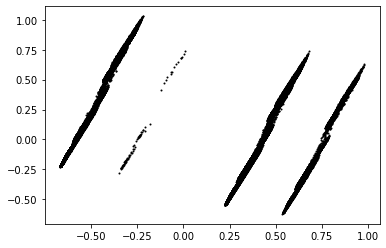

In [7]:
pca_fix = PCA(n_components=2) ##transformasi dataset menjadi satuan vektor x dan y agar lebih mudah di plot dan 
data_pca = pca_fix.fit_transform(scaled_data)  ##dicluster dengan kmeans
plt.scatter(data_pca[:,0],data_pca[:,1],s=1,c='black') ##plot data hasil pca

# K-Means

In [8]:
def K_means(k,data_pca):
  n=data_pca.shape[0]
  feature= data_pca.shape[1]

  ##set k points as intial centroid
  centroids=np.array([]).reshape(feature,0) 
  for i in range(k):
      rand=random.randint(0,n-1)
      centroids=np.c_[centroids,data_pca[rand]]

  output={}

  ##repeat
  move = True
  while move:
    temp_centroids = centroids.copy() ##centroid pembanding untuk pergerakan selanjutnya

    ##penghitungan jarak ke tiap centroid oleh tiap data
    EuclidianDistance=np.array([]).reshape(n,0)
    for j in range(k):
        tempDist=np.sum((data_pca-centroids[:,j])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    ##form K cluster by assigning each point to clossest centroid
    C=np.argmin(EuclidianDistance,axis=1)+1

    ##pengelompokan centroid
    Y={}
    for j in range(k):
        Y[j+1]=np.array([]).reshape(2,0)
    for i in range(n):
        Y[C[i]]=np.c_[Y[C[i]],data_pca[i]]
        if(i%10000==0):
          print(i)

    for j in range(k):
        Y[j+1]=Y[j+1].T

    ##recoumpute each centroid of each cluster
    for j in range(k):
        centroids[:,j]=np.mean(Y[j+1],axis=0)
    print(centroids)
    print(temp_centroids)
    ##until centroid donot change
    if((temp_centroids==centroids).all()):
      print('kok true')
      print(centroids)
      print(temp_centroids)
      move=False
    Output=Y
    
  ###plotting hasil final
  color=['red','blue','green','cyan','purple','brown']
  labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6']
  for a in range(k):
      plt.scatter(Output[a+1][:,0],Output[a+1][:,1],c=color[a],s=1,label=labels[a])
  plt.scatter(centroids[0,:],centroids[1,:],s=50,c='black',label='Centroids')
  plt.legend()
  plt.show()

  ##menentukan SSE untuk elbow method
  uwu = []
  for i in range(len(Output)):
    hasil = 0
    center = math.sqrt(centroids[0][i]**2 + centroids[1][i]**2)
    for j in range(len(Output[i+1])):
      titik = math.sqrt(Output[i+1][j][0]**2 + Output[i+1][j][1]**2)
      hasil = hasil + abs(center-titik)
    uwu.append(hasil)
  return min(uwu),Output,centroids

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-2.41734562e-17]
 [ 1.44220694e-16]]
[[-0.62064321]
 [-0.10865363]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-2.41734562e-17]
 [ 1.44220694e-16]]
[[-2.41734562e-17]
 [ 1.44220694e-16]]
kok true
[[-2.41734562e-17]
 [ 1.44220694e-16]]
[[-2.41734562e-17]
 [ 1.44220694e-16]]


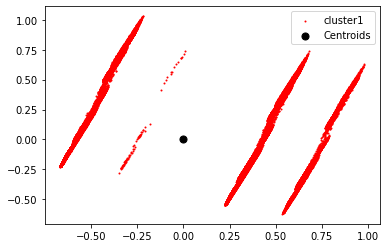

In [10]:
tes1=K_means(1,data_pca)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.20537418 -0.50987336]
 [ 0.07322601 -0.18179497]]
[[-0.59759987 -0.63403727]
 [-0.04930146 -0.13398153]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.37529155 -0.59796799]
 [ 0.02586515 -0.04121205]]
[[ 0.20537418 -0.50987336]
 [ 0.07322601 -0.18179497]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.47015294 -0.55507782]
 [-0.07111971  0.08396624]]
[[ 0.37529155 -0.59796799]
 [ 0.02586515 -0.04121205]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.4702252  -0.55499487]
 [-0.07121274  0.08405059]]
[[ 0.47015294 -0.55507782]
 [-0.07111971  0.08396624]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


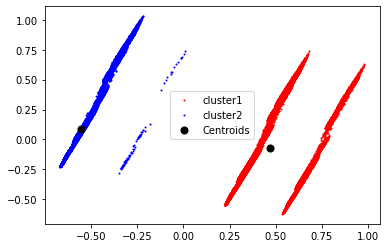

In [11]:
tes2=K_means(2,data_pca)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-0.27705157  0.1376679  -0.46737651]
 [-0.32474543  0.06937039 -0.19697263]]
[[-0.65315358 -0.61390995 -0.63405593]
 [-0.19026126 -0.08655026 -0.13830937]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.24253781  0.37360411 -0.60200315]
 [-0.49353354  0.06650756 -0.05318815]]
[[-0.27705157  0.1376679  -0.46737651]
 [-0.32474543  0.06937039 -0.19697263]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.33467608  0.55470905 -0.55519185]
 [-0.41551007  0.14520281  0.08364435]]
[[ 0.24253781  0.37360411 -0.60200315]
 [-0.49353354  0.06650756 -0.05318815]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.36122219  0.60015

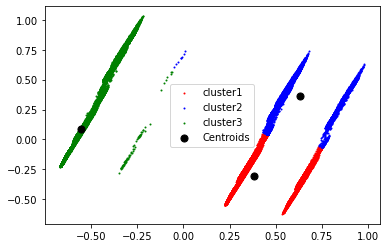

In [12]:
tes3=K_means(3,data_pca)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.35531734  0.17645346  0.04066274 -0.31939655]
 [ 0.48763611 -0.12812274  0.22620468 -0.23583761]]
[[ 0.50009527  0.333351    0.46922892  0.24356788]
 [ 0.27417005 -0.2435161   0.20001437 -0.49591366]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.62027804  0.38599171 -0.36084536 -0.61013992]
 [ 0.37879692 -0.30062948  0.64651955 -0.07549209]]
[[ 0.35531734  0.17645346  0.04066274 -0.31939655]
 [ 0.48763611 -0.12812274  0.22620468 -0.23583761]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.63004909  0.38414182 -0.35432565 -0.60901787]
 [ 0.36327373 -0.30523325  0.66604119 -0.07262956]]
[[ 0.62027804  0.38599171 -0.36084536 -0.61013992]
 [ 0.37879692 -0.30062948  0.64651955 -0.07549209]]
0
10

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


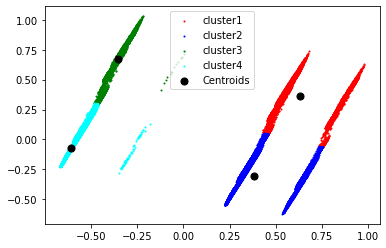

In [13]:
tes4=K_means(4,data_pca)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.31109651 -0.56589444  0.55033225  0.56490013  0.45356616]
 [-0.44427734  0.05327246  0.46892732  0.27380148 -0.17129683]]
[[ 0.26968152 -0.61434975  0.53909668  0.53110742  0.36264675]
 [-0.4414937  -0.08273154  0.36849904  0.34727127 -0.16874177]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.30841443 -0.55617027  0.58371901  0.65529645  0.46050345]
 [-0.43838454  0.08085065  0.469448    0.28961948 -0.17100174]]
[[ 0.31109651 -0.56589444  0.55033225  0.56490013  0.45356616]
 [-0.44427734  0.05327246  0.46892732  0.27380148 -0.17129683]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[ 0.30766478 -0.55511914  0.57153275  0.69728727  0.46166994]
 [-0.43703197  0.08381093  0.44372065  0.28953675 -

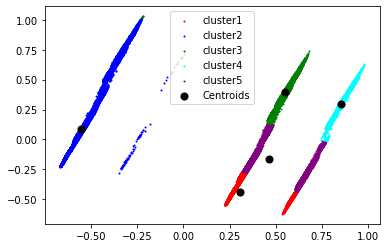

In [14]:
tes5=K_means(5,data_pca)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-0.3687755   0.2545319  -0.64286669  0.41912529  0.63258481 -0.60501197]
 [ 0.62062958 -0.47725803 -0.16291739 -0.25606792  0.37071364 -0.06176026]]
[[-0.4010286   0.24774761 -0.63733593  0.28480682  0.64522572 -0.6343625 ]
 [ 0.57604621 -0.48428332 -0.1481364  -0.40306944  0.6454547  -0.13541627]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-0.35545808  0.27129869 -0.63512383  0.45942707  0.63180389 -0.58178099]
 [ 0.66240106 -0.44760195 -0.14091521 -0.20775884  0.36783453 -0.00138758]]
[[-0.3687755   0.2545319  -0.64286669  0.41912529  0.63258481 -0.60501197]
 [ 0.62062958 -0.47725803 -0.16291739 -0.25606792  0.37071364 -0.06176026]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
[[-0.34729105  0.2

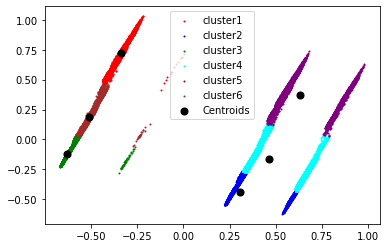

In [15]:
tes6=K_means(6,data_pca)

[124093.64364557352, 8798.440564669623, 4251.83956322295, 1575.013032965641, 442.2381149377073, 148.90055722386532]


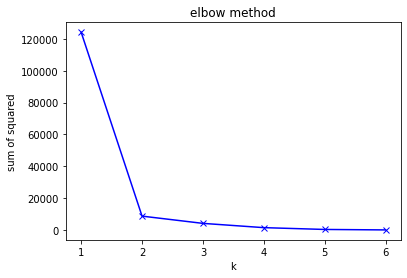

In [27]:
elbow = [tes1[0],tes2[0],tes3[0],tes4[0],tes5[0],tes6[0]]
print(elbow)

plt.plot(np.arange(1,7), elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared')
plt.title('elbow method')
plt.show()